In [74]:
from ast import increment_lineno
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
import util

In [7]:
utils.get_location_names

<function utils.get_location_names()>

In [8]:
df1 = pd.read_csv('/Users/pritish/Documents/Project_from_book/banglore_price/Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
df1.shape

(13320, 9)

In [10]:
df1.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [11]:
df2 = df1.drop(['area_type','society','balcony','availability'],axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [14]:
df3.shape

(13246, 5)

In [15]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [16]:
df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))

/var/folders/f0/3lpdtwmx6976dcvmd3nvn6m40000gn/T/ipykernel_1558/3847263516.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x : int(x.split(' ')[0]))


In [17]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [18]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [19]:
df3[df3.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [20]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [21]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [22]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [23]:
def convert_sqft_to_num(x):
  tokens = x.split('-')
  if len(tokens)==2:
    return float(tokens[0])+float(tokens[1])/2
  try:
    return float(x)
  except:
    return None

In [24]:
convert_sqft_to_num('2166')

2166.0

In [25]:
convert_sqft_to_num('2100-2850')

3525.0

In [26]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [27]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       3525.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [28]:
df4.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [29]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [30]:
len(df5.location.unique())

1304

In [31]:
df5.loction = df5.location.apply(lambda x: x.strip())
location_stats = df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

/var/folders/f0/3lpdtwmx6976dcvmd3nvn6m40000gn/T/ipykernel_1558/694542307.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df5.loction = df5.location.apply(lambda x: x.strip())


location
Whitefield             534
Sarjapur  Road         392
Electronic City        302
Kanakpura Road         266
Thanisandra            233
                      ... 
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Name: location, Length: 1304, dtype: int64

In [32]:
len(location_stats[location_stats <= 10])

1063

In [33]:
location_stats_less_than_10 = location_stats[location_stats <= 10]
location_stats_less_than_10

location
Dodsworth Layout         10
1st Block Koramangala    10
Nagappa Reddy Layout     10
Ganga Nagar              10
Dairy Circle             10
                         ..
 Banaswadi                1
Kanakadasa Layout         1
Kanakapur main road       1
Kanakapura  Rod           1
whitefiled                1
Name: location, Length: 1063, dtype: int64

In [34]:
len(df5.location.unique())

1304

In [35]:
df5.location = df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

242

In [36]:
df5.head(10)

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [37]:
df5[df5.total_sqft/df5.bhk<300].head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [38]:
df5.shape

(13246, 7)

In [39]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]

In [40]:
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [41]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6290.299983
std        4175.619211
min         267.829813
25%        4186.725844
50%        5281.690141
75%        6904.652015
max      176470.588235
Name: price_per_sqft, dtype: float64

In [42]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.price_per_sqft)
    st = np.std(subdf.price_per_sqft)
    reduced_df = subdf[(subdf.price_per_sqft > (m-st))&(subdf.price_per_sqft <= (m+st))]
    df_out = pd.concat([df_out, reduced_df], ignore_index=True)
  return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(10234, 7)

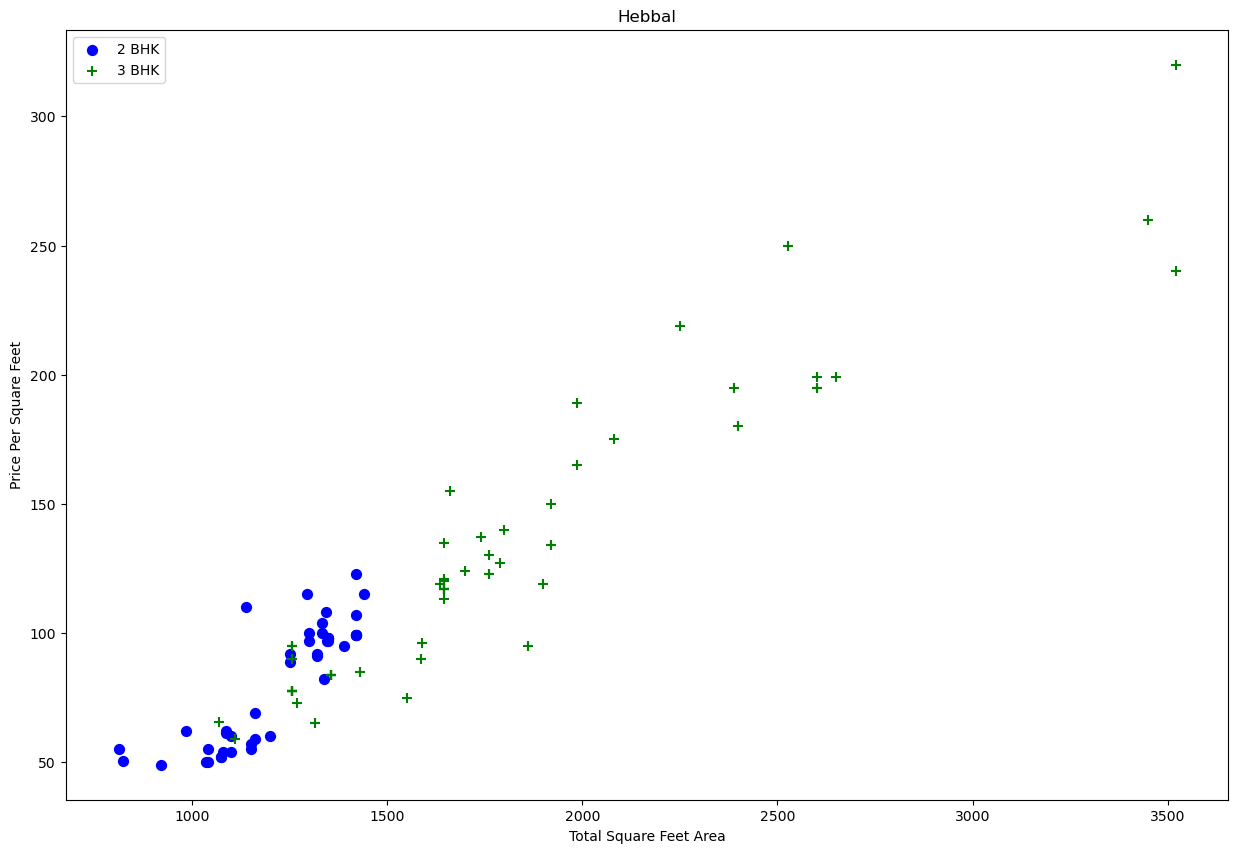

In [43]:
def plot_scatter_char(df, location):
  bhk2 = df[(df.location == location) & (df.bhk == 2)]
  bhk3 = df[(df.location == location) & (df.bhk == 3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft, bhk2.price, color = 'blue', label = '2 BHK', s = 50)
  plt.scatter(bhk3.total_sqft, bhk3.price,marker = '+', color = 'green', label = '3 BHK', s = 50)
  plt.xlabel('Total Square Feet Area')
  plt.ylabel('Price Per Square Feet')
  plt.title(location)
  plt.legend()

plot_scatter_char(df7,'Hebbal')

In [44]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean' : np.mean(bhk_df.price_per_sqft),
          'std' : np.std(bhk_df.price_per_sqft),
          'count' : bhk_df.shape[0]
      }
    for bhk, bhk_df in location_df.groupby('bhk'):
      stats = bhk_stats.get(bhk - 1)
      if stats and stats['count'] > 5:
        exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
  return df.drop(exclude_indices, axis = 'index')

df8 = remove_bhk_outliers(df7)
df8.shape


(7342, 7)

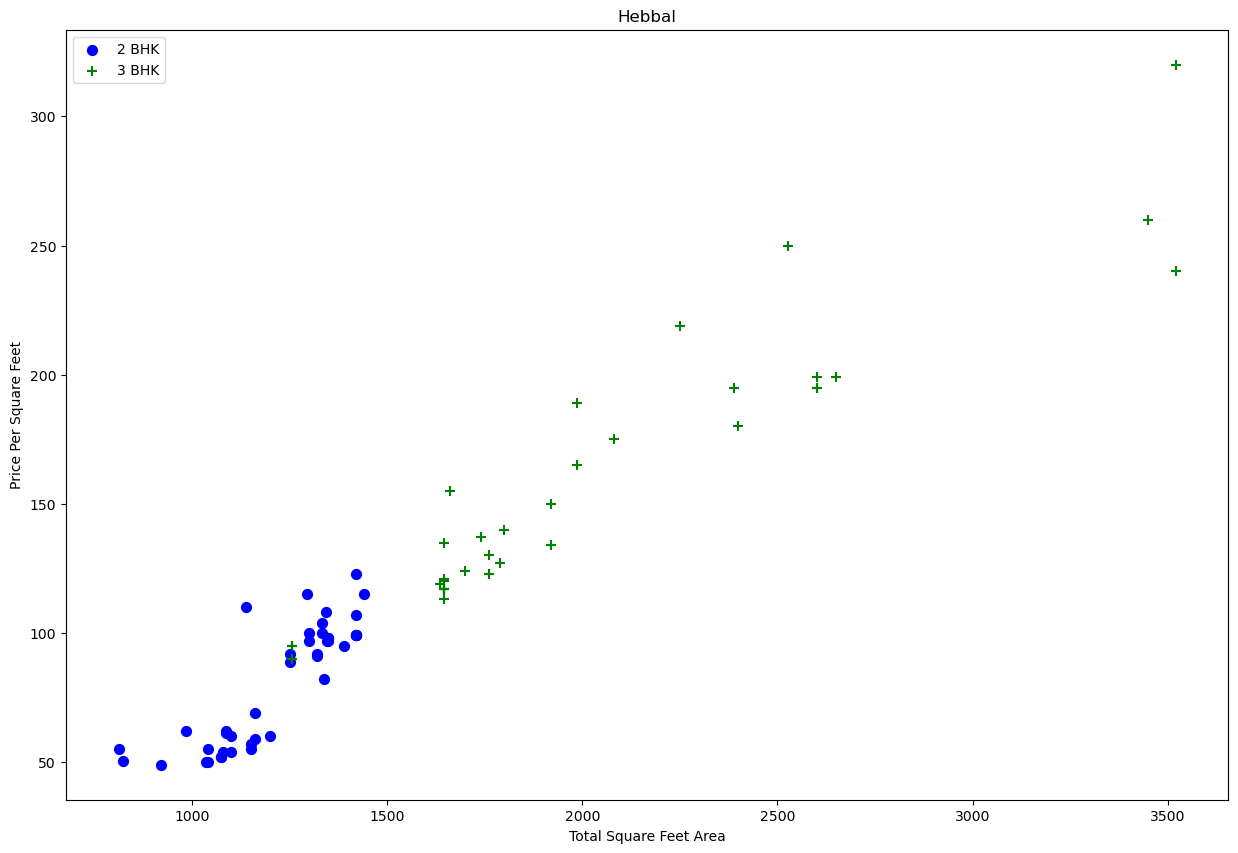

In [45]:
plot_scatter_char(df8,'Hebbal')

Text(0, 0.5, 'Count')

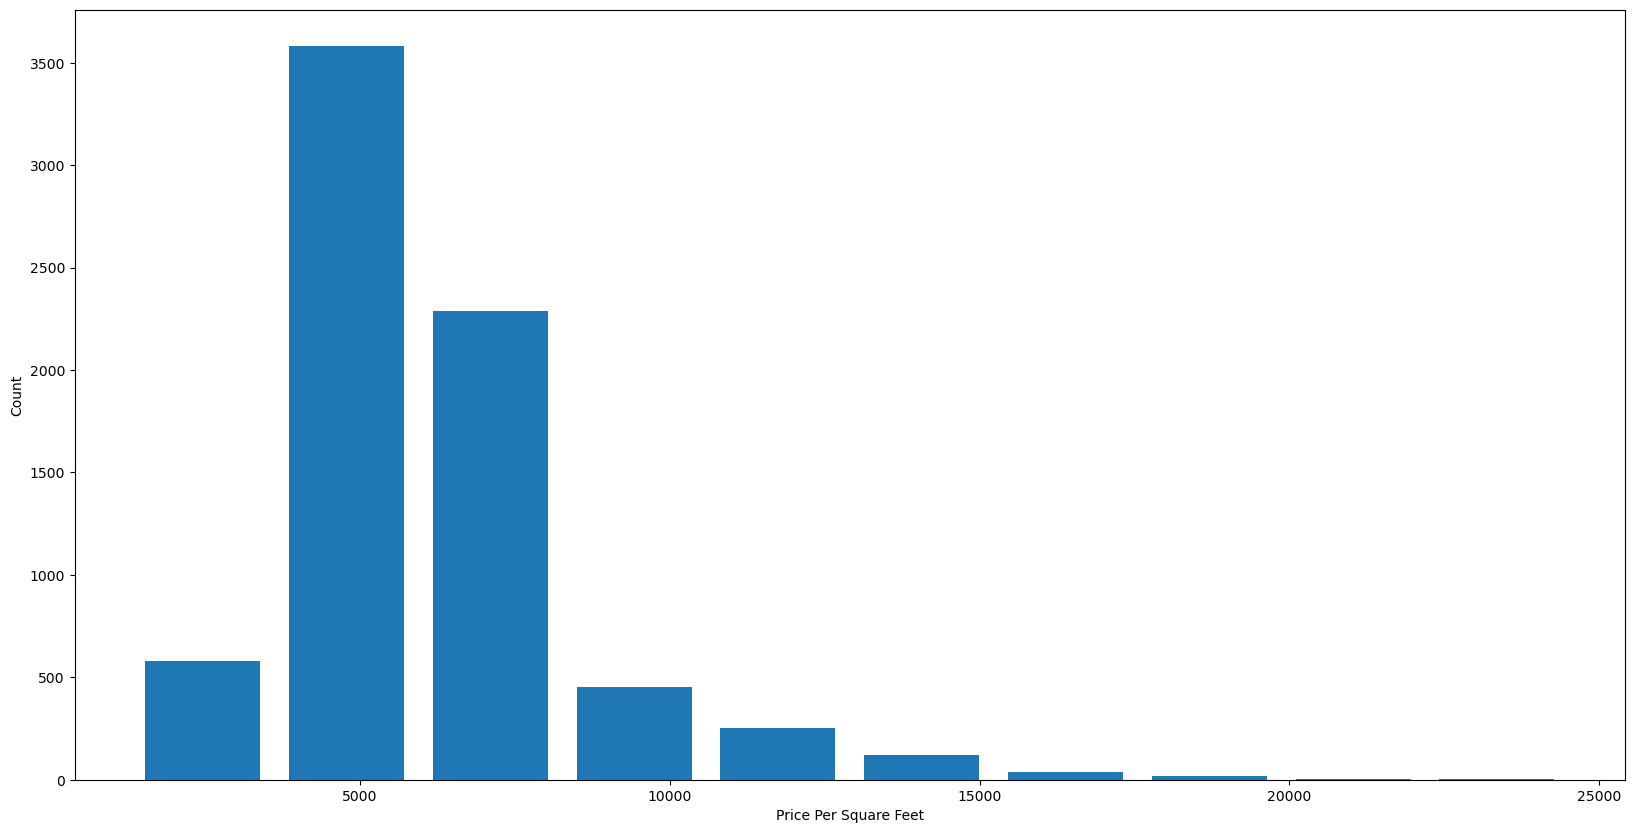

In [46]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)
plt.hist(df8.price_per_sqft, rwidth = 0.8)
plt.xlabel('Price Per Square Feet')
plt.ylabel('Count')

In [47]:
df8.bath.unique()

array([ 2.,  3.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [48]:
df8[df8.bath > 10]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
5267,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8471,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8560,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9299,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9631,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

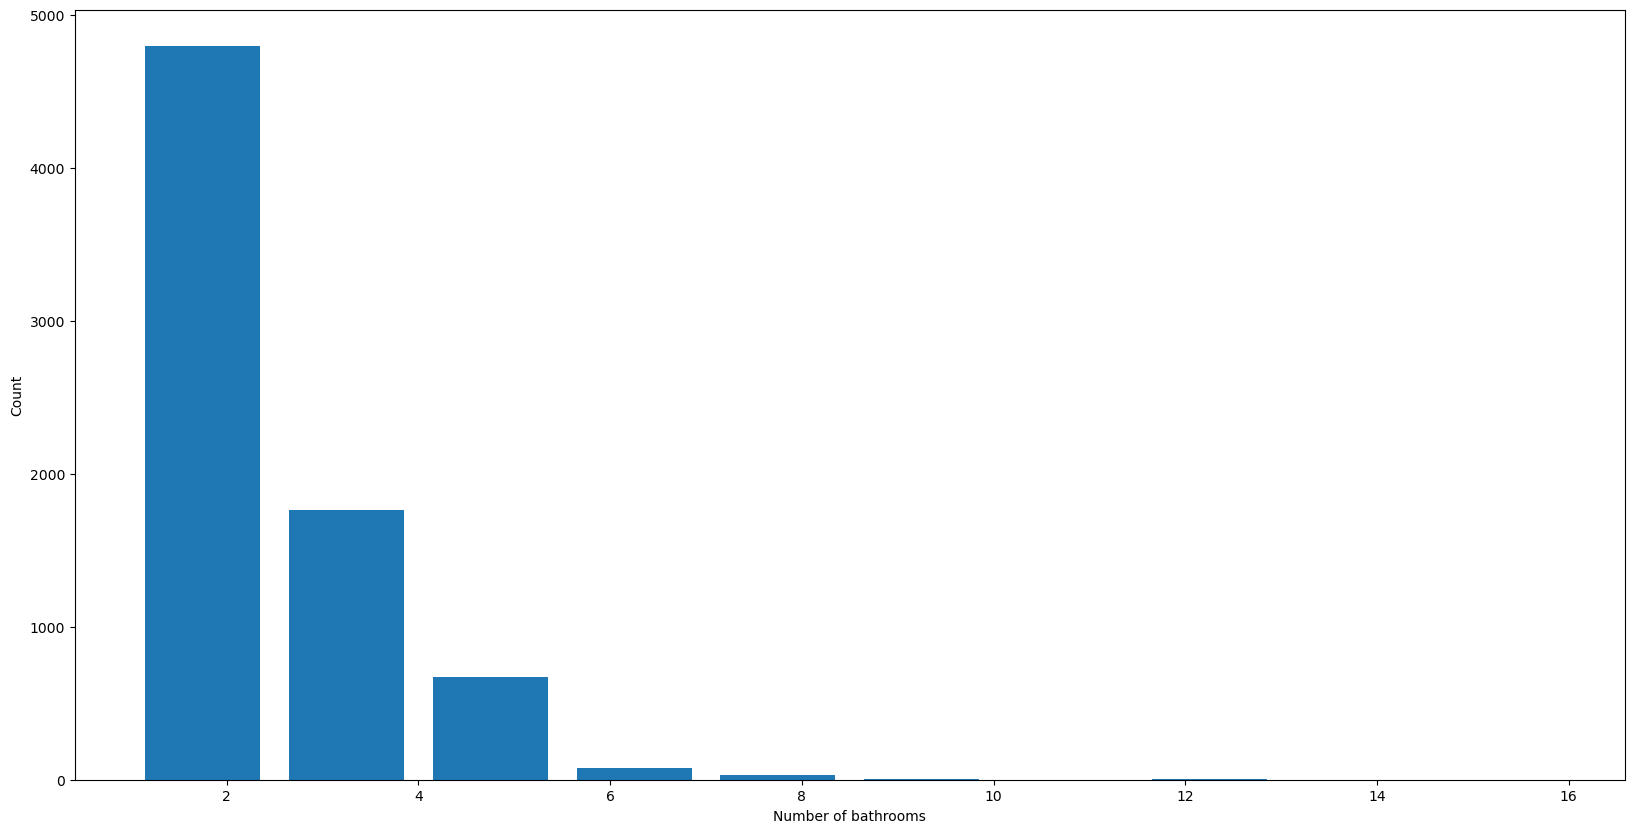

In [49]:
plt.hist(df8.bath, rwidth = 0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel('Count')

In [50]:
df8[df8.bath>df8.bhk + 2]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
1636,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5228,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6696,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8395,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [51]:
df9 = df8[df8.bath<df8.bhk + 2]
df9.shape

(7268, 7)

In [52]:
df10 = df9.drop(['size','price_per_sqft'],axis = 'columns')

In [53]:
df10.head(3)

,location,total_sqft,bath,price,bhk
1,Devarachikkanahalli,1250.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,40.0,2


In [54]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df11 = pd.concat([df10, dummies],axis = 'columns')
df11.head(3)

,location,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,Devarachikkanahalli,1250.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Devarachikkanahalli,1200.0,2.0,83.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Devarachikkanahalli,1170.0,2.0,40.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df12 = df11.drop('location', axis = 'columns')
df12.head(2)

,total_sqft,bath,price,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1250.0,2.0,40.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,83.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
df12.shape

(7268, 246)

In [58]:
X = df12.drop('price', axis = 'columns')
X.head()

,total_sqft,bath,bhk,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
1,1250.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1200.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1170.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1425.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,947.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
y = df12.price
y.head()

1    40.0
2    83.0
3    40.0
4    65.0
5    43.0
Name: price, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=10)

In [61]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_train, y_train)

0.849759146024132

In [62]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.83588212, 0.87564104, 0.84076744, 0.81291671, 0.77245699])

In [63]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
  algos = {
    'linear_regression' : {
        'model' : LinearRegression(),
        'params': {
            'fit_intercept' : [True, False],
            'positive': [True, False]
        }
    },
    'lasso': {
        'model': Lasso(),
        'params': {
            'alpha' : [1, 2],
            'selection': ['random', 'cyclic']
        }
    },
    'decision_tree' : {
    'model': DecisionTreeRegressor(),
    'params': {
        'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
        'splitter' : ['best', 'random']
    }
}
  }

  scores = []
  cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
  for algo_name, config in algos.items():
    gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
    gs.fit(X,y)
    scores.append({
        'model' : algo_name,
        'best_score' : gs.best_score_,
        'best_params' : gs.best_params_
    })

  return pd.DataFrame(scores, columns =['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.827899,"{'fit_intercept': True, 'positive': True}"
1,lasso,0.704151,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.729431,"{'criterion': 'absolute_error', 'splitter': 'r..."


In [64]:
import numpy as np
def predict_price(location, sqft, bath, bhk):
  loc_index = np.where(X.columns == location)[0][0]

  x = np.zeros(len(X.columns))
  x[0] = sqft
  x[1] = bath
  x[2] = bhk
  if loc_index >= 0:
    x[loc_index] = 1
  return lr_clf.predict([x])[0]

In [65]:
predict_price('1st Phase JP Nagar',1000,2,2)

/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


92.39974975585938

In [66]:
predict_price('Indira Nagar',1000,2,2)

/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


186.33765029907227

In [67]:
predict_price('Indira Nagar',1000,3,3)

/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


190.1385269165039

In [68]:
import pickle
with open('banglore_home_prices_model1.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [69]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open('columns.json','w') as f:
  f.write(json.dumps(columns))

In [70]:
pip install flask

Note: you may need to restart the kernel to use updated packages.


In [77]:
util.load_saved_artifacts

loading saved artifacts...start
loading saved artifacts...done


In [ ]:
from flask import Flask, request, jsonify
app = Flask(__name__)
import utils


@app.route('/get_location_names')
def get_location_names():
    response = jsonify({
        'locations': util.get_location_names()
    })
    response.headers.add('Access-Control-Allow-Origin', '*')
    return response

@app.route('/predict_home_price', methods =['POST'])
def predict_home_price():
    total_sqft = float(request.form['total_sqft'])
    location = request.form['location']
    bhk = int(request.form['bhk'])
    bath = int(request.form['bath'])
    print('here', location,total_sqft,bhk,bath)
    print(util.get_estimated_price(location,total_sqft,bhk,bath))
    response = jsonify({
        
        'estimated_price': util.get_estimated_price(location,total_sqft,bhk,bath)
    })
    response.headers.add('Access-Control-Allow-Origin', '*')
    print(response)
    
    return response

if __name__ == '__main__':
    print('Starting Python Flask Server for Home Price Prediction..')
    app.run()

Starting Python Flask Server for Home Price Prediction..
 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [26/Sep/2024 17:24:39] "GET /get_location_names HTTP/1.1" 200 -
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [26/Sep/2024 17:24:44] "POST /predict_home_price HTTP/1.1" 200 -


here 2nd stage nagarbhavi 1000.0 2 2
194.43
<Response 27 bytes [200 OK]>


127.0.0.1 - - [26/Sep/2024 17:25:52] "GET /get_location_names HTTP/1.1" 200 -
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [26/Sep/2024 17:25:56] "POST /predict_home_price HTTP/1.1" 200 -


here 2nd phase judicial layout 1000.0 2 2
25.57
<Response 26 bytes [200 OK]>


/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [26/Sep/2024 17:26:00] "POST /predict_home_price HTTP/1.1" 200 -


here 2nd phase judicial layout 1000.0 3 3
29.37
<Response 26 bytes [200 OK]>


/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [26/Sep/2024 17:26:08] "POST /predict_home_price HTTP/1.1" 200 -


here 5th phase jp nagar 1000.0 2 2
44.73
<Response 26 bytes [200 OK]>


/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [26/Sep/2024 17:26:50] "POST /predict_home_price HTTP/1.1" 200 -


here indira nagar 2000.0 2 2
264.69
<Response 27 bytes [200 OK]>


/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [26/Sep/2024 17:28:10] "POST /predict_home_price HTTP/1.1" 200 -


here 7th phase jp nagar 1000.0 2 2
63.32
<Response 26 bytes [200 OK]>


/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [26/Sep/2024 17:28:25] "POST /predict_home_price HTTP/1.1" 200 -


here kalyan nagar 1000.0 2 2
47.9
<Response 25 bytes [200 OK]>


/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [26/Sep/2024 18:05:22] "POST /predict_home_price HTTP/1.1" 200 -


here 2nd stage nagarbhavi 1000.0 2 2
194.43
<Response 27 bytes [200 OK]>


/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [26/Sep/2024 18:05:24] "POST /predict_home_price HTTP/1.1" 200 -


here 2nd stage nagarbhavi 1000.0 2 2
194.43
<Response 27 bytes [200 OK]>


/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [26/Sep/2024 18:05:25] "POST /predict_home_price HTTP/1.1" 200 -


here 2nd stage nagarbhavi 1000.0 2 2
194.43
<Response 27 bytes [200 OK]>


/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [26/Sep/2024 18:05:29] "POST /predict_home_price HTTP/1.1" 200 -


here 5th phase jp nagar 1000.0 2 2
44.73
<Response 26 bytes [200 OK]>


127.0.0.1 - - [26/Sep/2024 18:06:02] "GET /get_location_names HTTP/1.1" 200 -
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [26/Sep/2024 18:06:05] "POST /predict_home_price HTTP/1.1" 200 -


here 2nd stage nagarbhavi 1000.0 2 2
194.43
<Response 27 bytes [200 OK]>


/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [26/Sep/2024 18:06:10] "POST /predict_home_price HTTP/1.1" 200 -


here 2nd stage nagarbhavi 1000.0 3 2
194.06
<Response 27 bytes [200 OK]>


/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [26/Sep/2024 18:06:14] "POST /predict_home_price HTTP/1.1" 200 -


here 2nd stage nagarbhavi 1000.0 5 5
205.83
<Response 27 bytes [200 OK]>


/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [26/Sep/2024 18:09:26] "POST /predict_home_price HTTP/1.1" 200 -


here ambedkar nagar 1000.0 2 2
55.51
<Response 26 bytes [200 OK]>


/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
127.0.0.1 - - [29/Sep/2024 10:42:53] "POST /predict_home_price HTTP/1.1" 200 -


here amruthahalli 1000.0 2 3
52.9
<Response 25 bytes [200 OK]>


In [1]:
import pickle
import json
import numpy as np

__locations = None
__data_columns = None
__model = None

def get_estimated_price(location,sqft,bhk,bath):
    try:
        loc_index = __data_columns.index(location.lower())
    except:
        loc_index = -1

    x = np.zeros(len(__data_columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index>=0:
        x[loc_index] = 1

    return round(__model.predict([x])[0],2)


def load_saved_artifacts():
    print("loading saved artifacts...start")
    global  __data_columns
    global __locations

    with open("./artifacts/columns.json", "r") as f:
        __data_columns = json.load(f)['data_columns']
        __locations = __data_columns[3:]  # first 3 columns are sqft, bath, bhk

    global __model
    if __model is None:
        with open('./artifacts/banglore_home_prices_model.pickle', 'rb') as f:
            __model = pickle.load(f)
    print("loading saved artifacts...done")

def get_location_names():
    return __locations

def get_data_columns():
    return __data_columns

if __name__ == '__main__':
    load_saved_artifacts()
    print(get_location_names())
    print(get_estimated_price('1st Phase JP Nagar',1000, 3, 3))
    print(get_estimated_price('1st Phase JP Nagar', 1000, 2, 2))
    print(get_estimated_price('Kalhalli', 1000, 2, 2)) # other location
    print(get_estimated_price('Ejipura', 1000, 2, 2))  # other location

loading saved artifacts...start
loading saved artifacts...done
[' devarachikkanahalli', '1st block jayanagar', '1st phase jp nagar', '2nd phase judicial layout', '2nd stage nagarbhavi', '5th block hbr layout', '5th phase jp nagar', '6th phase jp nagar', '7th phase jp nagar', '8th phase jp nagar', '9th phase jp nagar', 'aecs layout', 'abbigere', 'akshaya nagar', 'ambalipura', 'ambedkar nagar', 'amruthahalli', 'anandapura', 'ananth nagar', 'anekal', 'anjanapura', 'ardendale', 'arekere', 'attibele', 'beml layout', 'btm 2nd stage', 'btm layout', 'babusapalaya', 'badavala nagar', 'balagere', 'banashankari', 'banashankari stage ii', 'banashankari stage iii', 'banashankari stage v', 'banashankari stage vi', 'banaswadi', 'banjara layout', 'bannerghatta', 'bannerghatta road', 'basavangudi', 'basaveshwara nagar', 'battarahalli', 'begur', 'begur road', 'bellandur', 'benson town', 'bharathi nagar', 'bhoganhalli', 'billekahalli', 'binny pete', 'bisuvanahalli', 'bommanahalli', 'bommasandra', 'bommas

/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/Users/pritish/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
